# Stability test

## Interferometer chamber

### Under vacuum


Results on the measurements on 07/10/2019:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import pandas as pd
from tqdm import tqdm
import scipy.constants as cns
from scipy import stats

In [2]:
path = 'O:\\19_LaserData\\14_LTA1\\Automatic_recordings\\data\\frames'
fname = os.listdir(path)

In [3]:
fname = [name for name in fname if ('20191007_' in name and '.h5' in name and 'seiz' in name)]


In [4]:
fname

['phases_20191007_154447_seizmograph.h5',
 'phases_20191007_165727_seizmograph.h5',
 'phases_20191007_171431_seizmograph.h5',
 'phases_20191007_173956_seizmograph.h5']

In [5]:
def read_h5file(name):
    with h5py.File(name, 'r') as f:
        ph = np.array(f['phase'])
        ti = np.array(f['time'])
        #raw = np.array(f['signal'])
    return (ti, ph)

def read_h5file_seizmograph(name):
    with h5py.File(name, 'r') as f:
        d = {key:np.array(f[key]) for key in f.keys()}
        tmp = pd.DataFrame(d)
    return tmp

def normalize_time(t):
    t = t - t.min()
    tmp = np.linspace(0, np.round(t.max()), len(t))
    return(tmp)



In [6]:
exp = []
for i,fn in tqdm(enumerate(fname)):
    fullname = os.path.join(path, fn)
    df = read_h5file_seizmograph(fullname)
    exp.append(df)


4it [00:33,  8.25s/it]


In [11]:
with h5py.File(os.path.join(path, fname[0]), 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['ch1', 'ch2', 'ch3']>


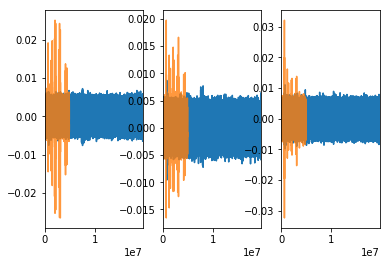

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3)
alpha=1
for i in exp[2:]:
    i['ch1'].plot(ax=axes[0], alpha=alpha)
    i['ch2'].plot(ax=axes[1], alpha=alpha)
    i['ch3'].plot(ax=axes[2], alpha=alpha)
    alpha=alpha-0.2

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
exp[3].plot(ax=axes[0], alpha=0.5)
exp[3].plot(ax=axes[1], alpha=0.5)
axes[1].set_xlim([5e5,1e6])
exp[3].plot(ax=axes[2], alpha=0.5)

In [ ]:
for i in exp:
    print(i.corr())

It seems like **ch2** and **ch3** are anticorrelated and actually the correlation is not really big between them. 

In [ ]:
for i in exp:
    print(i.describe())

In [ ]:
exp[3].iloc[670000:700000, ::-1].plot(alpha=0.5)

The amplitude of the events is not equal on the channels.

In [8]:
for i in exp:
    print(i.std())

ch1    0.001462
ch2    0.001247
ch3    0.001784
dtype: float64
ch1    0.001461
ch2    0.001266
ch3    0.001824
dtype: float64
ch1    0.001455
ch2    0.001280
ch3    0.001816
dtype: float64
ch1    0.001804
ch2    0.001406
ch3    0.001872
dtype: float64


### Spectral analysis

In [24]:
exp_fft=[]
for m in exp_mod:
    N = len(m.phase)
    t = m.index.values
    T = t.max() - t.min()
    dw = 2*np.pi / T
    dNu = 1 / (t[1]-t[0])
    print(dNu)
    freq = np.fft.fftshift(np.fft.fftfreq(N) * N * dw) / 2 / np.pi
    yft = np.fft.fftshift(np.fft.fft(m.phase))
    yft_hamming = np.fft.fftshift(np.fft.fft(m.phase * np.hamming(N)))
    tmp = pd.DataFrame({'fft':yft, 'fft_hmg':yft_hamming, 'spectrum':np.abs(yft_hamming)/np.max(np.abs(yft_hamming))}, index=freq)
    tmp['sp_smooth'] = tmp[['spectrum']].rolling(20, win_type='hamming', center=True).mean()
    exp_fft.append(tmp)

191.74166666666667
189.46666666666667
192.50333333333333


(0, 0.1)

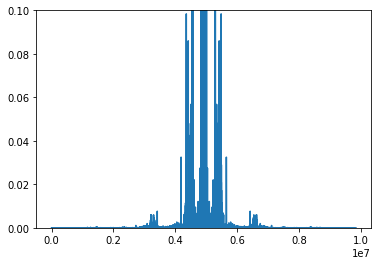

In [14]:
N = len(exp[0].ch1)
#t = m.index.values
#T = t.max() - t.min()
#dw = 2*np.pi / T
#dNu = 1 / (t[1]-t[0])
#print(dNu)
#freq = np.fft.fftshift(np.fft.fftfreq(N) * N * dw) / 2 / np.pi
yft = np.fft.fftshift(np.fft.fft(exp[0].ch1))
#yft_hamming = np.fft.fftshift(np.fft.fft(m.phase * np.hamming(N)))
#tmp = pd.DataFrame({'fft':yft, 'fft_hmg':yft_hamming, 'spectrum':np.abs(yft_hamming)/np.max(np.abs(yft_hamming))}, index=freq)
#tmp['sp_smooth'] = tmp[['spectrum']].rolling(20, win_type='hamming', center=True).mean()
plt.plot(np.abs(yft)/np.max(np.abs(yft)))
plt.ylim([0,0.1])

(0, 0.5)

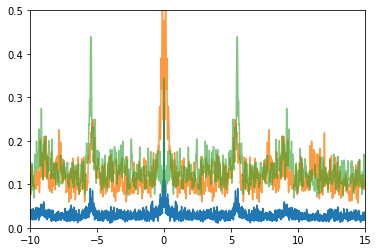

In [28]:
alpha = 1
for i in exp_fft:
    i['sp_smooth'].plot(alpha=alpha)
    alpha=alpha-0.2
plt.xlim([-10, 15])
plt.ylim([0,0.5])